# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_df = pd.merge(mouse_metadata,study_results, on = "Mouse ID", how = "outer" )

# Display the data table for preview

combined_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
combined_df["Mouse ID"].count()


1893

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.#.to(list) used to return the True value in the list
Dup_ID = combined_df["Mouse ID"].value_counts()>10

combined_df.loc[(combined_df["Mouse ID"] == "g989") & (combined_df["Timepoint"] == 0)]



,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.0,0
909,g989,Propriva,Female,21,26,0,45.0,0


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
combined_df.iloc[908,:]

Mouse ID                  g989
Drug Regimen          Propriva
Sex                     Female
Age_months                  21
Weight (g)                  26
Timepoint                    0
Tumor Volume (mm3)        45.0
Metastatic Sites             0
Name: 908, dtype: object

In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = combined_df.copy()
clean_df.drop(index=908, inplace=True)


In [6]:
# Checking the number of mice in the clean DataFrame.
clean_df["Mouse ID"].count()

1892

## Summary Statistics

In [19]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
regimen_df = clean_df.groupby(["Drug Regimen"])
regimen_mean = regimen_df["Tumor Volume (mm3)"].mean()
regimen_median = regimen_df["Tumor Volume (mm3)"].median()
regimen_variance = regimen_df["Tumor Volume (mm3)"].var()
regimen_stdev =regimen_df["Tumor Volume (mm3)"].std()
regimen_sem = regimen_df["Tumor Volume (mm3)"].sem()
regimen_sum_df = [{"Mean":regimen_mean,"Median":regimen_median,"Variance":regimen_variance,"Standard Dev":regimen_stdev,"SEM":regimen_sem}]



,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
adv_df = regimen_df["Tumor Volume (mm3)"].agg(['mean','median','var','std','sem','count'])

adv_df

,mean,median,var,std,sem,count
Drug Regimen,,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346,230
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821,178
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236,178
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860,188
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466,186
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331,181
Propriva,52.368318,50.909965,42.278090,6.502160,0.514041,160
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955,228
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111,181


## Bar and Pie Charts

<Axes: title={'center': 'Total Mice per Regimen'}, xlabel='Number of Mice', ylabel='Drug Regimen'>

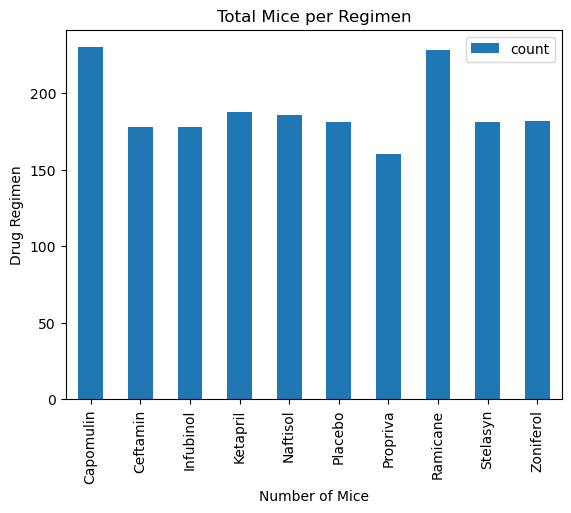

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.(y = 'count', kind = "bar",use_index = True )
adv_df.plot(y='count', kind = "bar",use_index = True, title ="Total Mice per Regimen",xlabel = "Number of Mice",ylabel = "Drug Regimen")



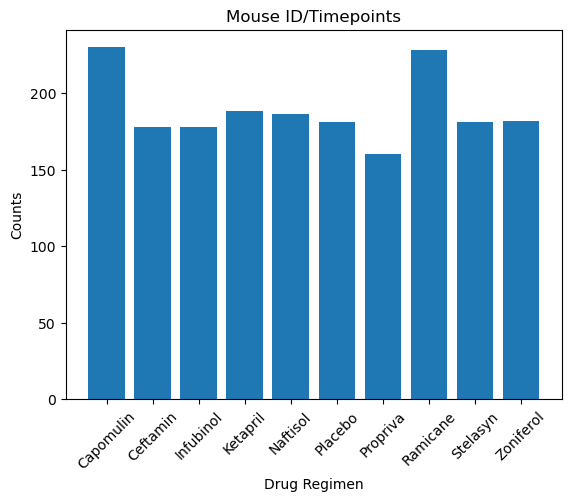

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
plt.bar(adv_df.index, adv_df['count'])
plt.title("Mouse ID/Timepoints")
plt.xlabel("Drug Regimen")
plt.ylabel("Counts")
plt.xticks(rotation = 45)
plt.show()

<Axes: title={'center': 'Female Vs Male Mice Count'}, ylabel='Sex'>

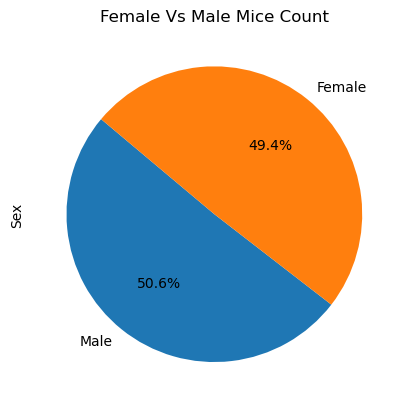

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
clean_df["Sex"].value_counts().plot(kind = "pie",title = "Female Vs Male Mice Count",startangle=140,autopct="%1.1f%%")


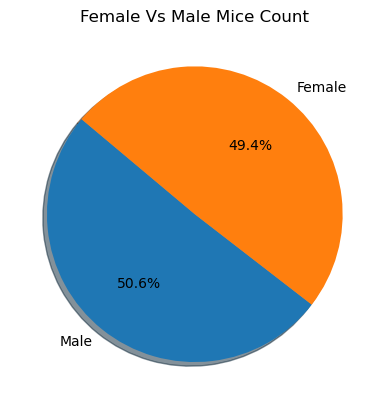

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
Gender = clean_df["Sex"].unique()
plt.pie(clean_df["Sex"].value_counts(),labels= Gender,
         autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("Female Vs Male Mice Count")
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

#reference for get_group function
# Start by getting the last (greatest) timepoint for each mouse
#Capomulin
capomulin_df = regimen_df.get_group("Capomulin")

last_cap_tp = capomulin_df.loc[capomulin_df["Timepoint"] == 45].sum()
#Ramicane
ramicane_df = regimen_df.get_group("Ramicane")
last_ram_tp = ramicane_df.loc[ramicane_df["Timepoint"] == 45].sum()
#Infubinol
infubinol_df = regimen_df.get_group("Infubinol")
last_infu_tp = infubinol_df.loc[infubinol_df["Timepoint"] == 45].sum()
#Ceftamin
ceftamin_df = regimen_df.get_group("Ceftamin")
last_cefta_tp = ceftamin_df.loc[ceftamin_df["Timepoint"] == 45].sum()
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
adv_df_new = adv_df.loc[["Capomulin","Ramicane","Infubinol","Ceftamin"],:]
adv_df_new["Tumor Volume"] = [last_cap_tp["Tumor Volume (mm3)"],last_ram_tp["Tumor Volume (mm3)"],last_infu_tp["Tumor Volume (mm3)"],last_cefta_tp["Tumor Volume (mm3)"]]

adv_df_new["Tumor Volume"]


Drug Regimen
Capomulin    760.958390
Ramicane     699.111896
Infubinol    591.800060
Ceftamin     833.721477
Name: Tumor Volume, dtype: float64

In [14]:
# Put treatments into a list for for loop (and later for plot labels) 
treatments = [ind for ind in adv_df_new.index]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
quartiles = adv_df_new["Tumor Volume"].quantile([.25,.5,.75])
lower_quartile = quartiles[0.25]
upper_quartile = quartiles[0.75]
IQR = upper_quartile - lower_quartile

    # Locate the rows which contain mice on each drug and get the tumor volumes
tum_vols = adv_df_new.iloc[:,6]
    # add subset 
tumor_vol.append(tum_vols)
    # Determine outliers using upper and lower bounds
lower_bound = lower_quartile - 1.5*IQR
upper_bound = upper_quartile + 1.5*IQR
[lower_bound,upper_bound] #No Outliers outside of the lower and upper bounds

[511.98609997375024, 939.4469987237499]

{'whiskers': [<matplotlib.lines.Line2D at 0x7fcfab512fb0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fcfab5134f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fcfab512d10>],
 'medians': [<matplotlib.lines.Line2D at 0x7fcfab513a30>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fcfab513cd0>],
 'means': []}

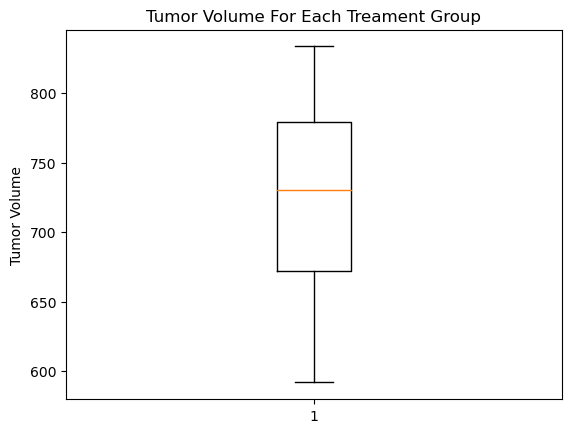

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig1, ax1 =plt.subplots()
ax1.set_title('Tumor Volume For Each Treament Group')

ax1.set_ylabel('Tumor Volume')
ax1.boxplot(tum_vols)

## Line and Scatter Plots

Text(0.5, 1.0, 'Tumor Volume Vs Time Points')

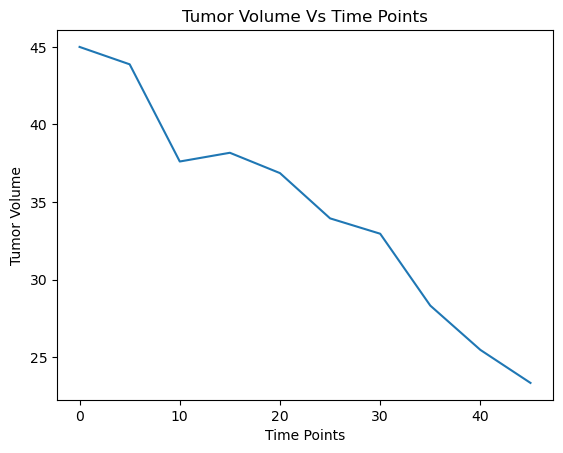

In [16]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

plt.plot(clean_df.iloc[10:20,5],clean_df.iloc[10:20,6])
plt.xlabel("Time Points")
plt.ylabel("Tumor Volume")
plt.title("Tumor Volume Vs Time Points")


/var/folders/qn/_ggx04zx5hn5grglx40xmqj80000gn/T/ipykernel_83269/394947052.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  new_df = capomulin_df.groupby("Mouse ID").mean()


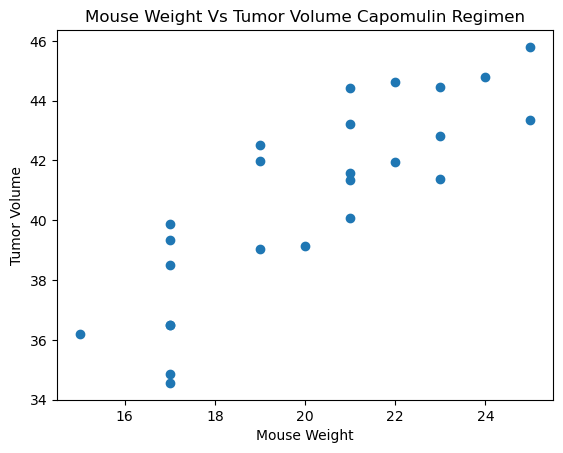

In [17]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

new_df = capomulin_df.groupby("Mouse ID").mean()
plt.scatter(new_df["Weight (g)"], new_df["Tumor Volume (mm3)"])
plt.title("Mouse Weight Vs Tumor Volume Capomulin Regimen")
plt.xlabel("Mouse Weight")
plt.ylabel("Tumor Volume")
plt.show()


## Correlation and Regression

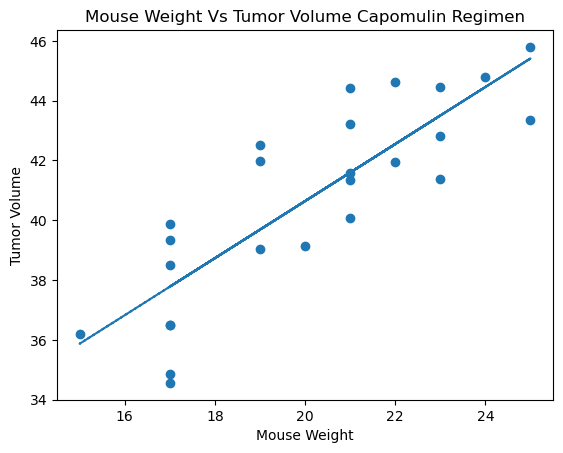

PearsonRResult(statistic=0.841936342469472, pvalue=1.3225722434712605e-07)

In [18]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
#correlation coefficient
st.pearsonr(new_df["Weight (g)"], new_df["Tumor Volume (mm3)"])

#linear regression model
cr_slope, cr_int, cr_r, cr_p, cr_std_err = st.linregress(new_df["Weight (g)"],new_df["Tumor Volume (mm3)"])
cr_fit = cr_slope * new_df["Weight (g)"] + cr_int
plt.scatter(new_df["Weight (g)"],new_df["Tumor Volume (mm3)"])
plt.title("Mouse Weight Vs Tumor Volume Capomulin Regimen")
plt.xlabel("Mouse Weight")
plt.ylabel("Tumor Volume")

#add line of best fit
plt.plot(new_df["Weight (g)"],cr_fit,"--")
plt.show()
st.pearsonr(new_df["Weight (g)"], new_df["Tumor Volume (mm3)"])